# <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [20]:
# Recolectar los datos

tweets = tweepy.Cursor(api.search,
                       q=['TRUMP -RT'],
                       lang='en',
                       result_type='mixed',
                       tweet_mode='extended',
                       include_rts=False).items(100)
t = []

for tweet in tweets:
        temp = []
        temp.append(tweet.id)
        temp.append(tweet.created_at)
        temp.append(tweet.user.screen_name)
        temp.append(tweet.full_text)
        temp.append(tweet.user.location)
        temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
        t.append(temp)


In [27]:
data = pd.DataFrame(t)
data.columns = ['id','fecha_pub','usuario','tweet','user_location','link']
data.head()


,id,fecha_pub,usuario,tweet,user_location,link
0,1329728889296355328,2020-11-20 10:10:47,EdwardNorton,I’m no political pundit but I grew up w a dad ...,New York,https://twitter.com/i/web/status/1329728889296...
1,1329508865591926785,2020-11-19 19:36:29,joncoopertweets,Trump is the worst president in U.S. history. ...,New York,https://twitter.com/i/web/status/1329508865591...
2,1330032205817634817,2020-11-21 06:16:03,bakerstherald,"@edwardjolmos @Analisa_Swan Edward, are you ab...",,https://twitter.com/i/web/status/1330032205817...
3,1330032204756422657,2020-11-21 06:16:03,Lisa45811563,@donwinslow 100% agree . The day she sat at th...,,https://twitter.com/i/web/status/1330032204756...
4,1330032203485630464,2020-11-21 06:16:02,xandriteme,Trump is a fucking JOKE..... https://t.co/gBjt...,"British Columbia, Canada",https://twitter.com/i/web/status/1330032203485...


In [28]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [29]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,id,fecha_pub,usuario,tweet,user_location,link,clean,links,hashtags,mentions
0,1329728889296355328,2020-11-20 10:10:47,EdwardNorton,I’m no political pundit but I grew up w a dad ...,New York,https://twitter.com/i/web/status/1329728889296...,I’m no political pundit but I grew up w a dad ...,[],[],[]
1,1329508865591926785,2020-11-19 19:36:29,joncoopertweets,Trump is the worst president in U.S. history. ...,New York,https://twitter.com/i/web/status/1329508865591...,Trump is the worst president in U.S. history. ...,[],[],[]
2,1330032205817634817,2020-11-21 06:16:03,bakerstherald,"@edwardjolmos @Analisa_Swan Edward, are you ab...",,https://twitter.com/i/web/status/1330032205817...,"Edward, are you able to do a report on why m...",[],[],"[@edwardjolmos, @Analisa_Swan]"
3,1330032204756422657,2020-11-21 06:16:03,Lisa45811563,@donwinslow 100% agree . The day she sat at th...,,https://twitter.com/i/web/status/1330032204756...,100% agree . The day she sat at the Trump Pre...,[],[],[@donwinslow]
4,1330032203485630464,2020-11-21 06:16:02,xandriteme,Trump is a fucking JOKE..... https://t.co/gBjt...,"British Columbia, Canada",https://twitter.com/i/web/status/1330032203485...,Trump is a fucking JOKE.....,[https://t.co/gBjtGo2Bse],[],[]


In [35]:
data['sentimiento'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,id,fecha_pub,usuario,tweet,user_location,link,clean,links,hashtags,mentions,sentimiento
0,1329728889296355328,2020-11-20 10:10:47,EdwardNorton,I’m no political pundit but I grew up w a dad ...,New York,https://twitter.com/i/web/status/1329728889296...,I’m no political pundit but I grew up w a dad ...,[],[],[],0.2263
1,1329508865591926785,2020-11-19 19:36:29,joncoopertweets,Trump is the worst president in U.S. history. ...,New York,https://twitter.com/i/web/status/1329508865591...,Trump is the worst president in U.S. history. ...,[],[],[],-0.6249
2,1330032205817634817,2020-11-21 06:16:03,bakerstherald,"@edwardjolmos @Analisa_Swan Edward, are you ab...",,https://twitter.com/i/web/status/1330032205817...,"Edward, are you able to do a report on why m...",[],[],"[@edwardjolmos, @Analisa_Swan]",0.8716
3,1330032204756422657,2020-11-21 06:16:03,Lisa45811563,@donwinslow 100% agree . The day she sat at th...,,https://twitter.com/i/web/status/1330032204756...,100% agree . The day she sat at the Trump Pre...,[],[],[@donwinslow],0.6486
4,1330032203485630464,2020-11-21 06:16:02,xandriteme,Trump is a fucking JOKE..... https://t.co/gBjt...,"British Columbia, Canada",https://twitter.com/i/web/status/1330032203485...,Trump is a fucking JOKE.....,[https://t.co/gBjtGo2Bse],[],[],0.4983


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [52]:
data[['clean', 'sentimiento']].sort_values('sentimiento')

,clean,sentimiento
29,"Trump’s Legacy of loss\n\n1. 245,000+ Dead\...",-0.9590
9,IT'S NO GOOD!!! Nothing will help except to G...,-0.9543
81,"I mean, you do not let go of a murderer becau...",-0.8807
27,Your not really going to the White House tomo...,-0.8682
15,when the Dems impeached Trump for nothing he ...,-0.7795
...,...,...
2,"Edward, are you able to do a report on why m...",0.8716
90,Laugh it up. The coup could succeed. Complete...,0.8977
28,"Biden has 79.5 million votes, more than any pr...",0.9273
84,"Hey man, if Conservatives are so confident t...",0.9854


#### Tweet más negativo

In [39]:
data.loc[29]['clean']

'   Trump’s Legacy of loss\n\n1. 245,000+ Dead\n2. 10,000,000+ Infected\n3. Election interference\n4. Children in cages\n5. DOJ gutted\n6. 44,000,000 unemployed\n7. Impeachment\n8. $27,000,000,000,000 Debt\n9. Russian Bounties on US Soldiers\n10. Police Brutality\n11. Economic recession'

#### Tweet más positivo

In [40]:
data.loc[38]['clean']

'   Lol what’s Trump now 1-28 in lawsuits hahahahahahaha😂😂😂😂😂😂😂😂😂😂😂😂😂 I’d pay to see the look on your face come January when you’re crying like a little bitch when Trump gets the boot. Whatever pipe dream you think is gonna change the results will NEVER happen snowflake'

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [63]:
data['Clasif'] = data['sentimiento'].apply(lambda x: "Positivo" if x > 0 else "Negativo" if x < 0 else "NA" )
data['Clasif'].value_counts()

Negativo    50
Positivo    30
NA          20
Name: Clasif, dtype: int64

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

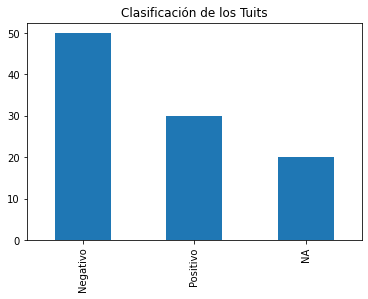

In [65]:
plot = data['Clasif'].value_counts().plot(kind='bar',
                                            title='Clasificación de los Tuits')

In [66]:
def pre_procesado(texto):
    
    texto = texto.lower() # minúsculas
    texto = re.sub(r"[\W\d_]+", " ",texto) # remove caract, números
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_en] # stopwords
    texto = " ".join(texto)
    return texto

In [69]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')
import gensim.models.word2vec as w2v


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
data['preprocesado'] = data['clean'].apply(lambda text: pre_procesado(text))

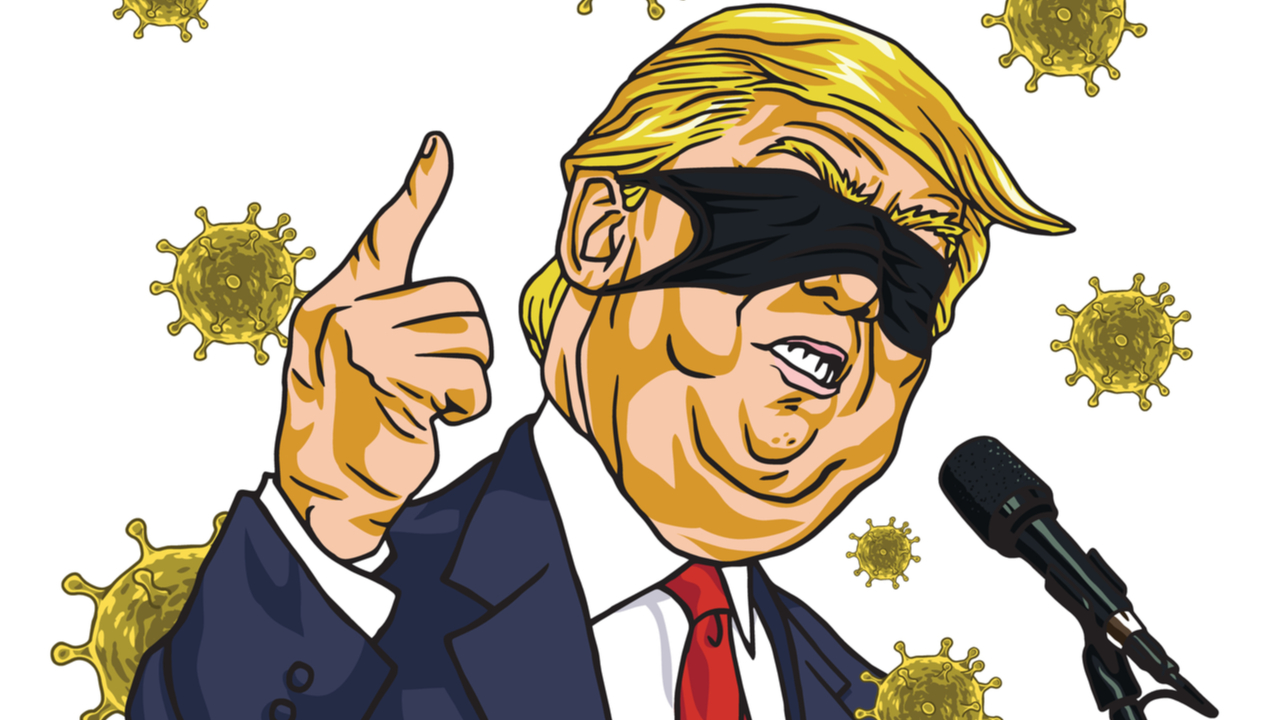

In [96]:
Trump = PIL.Image.open("Trump.jpg")
display(Trump)
mask = np.array(Trump)

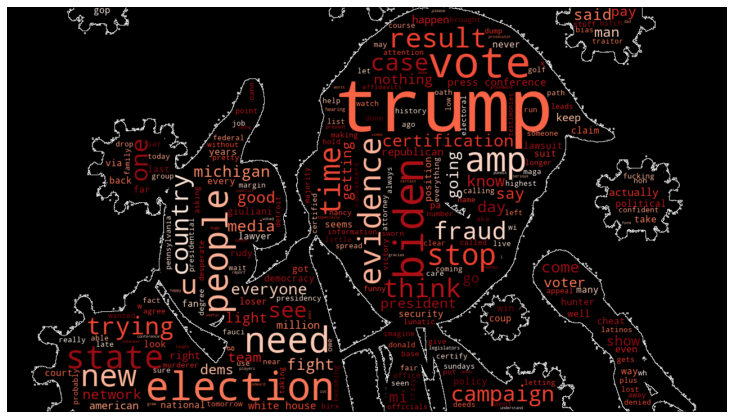

In [94]:
palabras = data.preprocesado.str.cat(sep=" ")
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=1500, max_words=250,
                      background_color='black', colormap='Reds',
                      stopwords=None,
                      mask=mask, contour_width=0.5, contour_color='white').generate(palabras)

wordcloud.to_file("Trump_wc.png")
  
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()